In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from src.process_data import process_data,load_data

import datashader as ds
import datashader.transfer_functions as tf

import bokeh.plotting as bp
from bokeh.models import ColumnDataSource
from datashader.bokeh_ext import InteractiveImage

In [132]:
df = process_data(fn='data/ripc_rel.csv',normalize='log2_fc')

Cached file found at ../data/ripc_rel.pk
Loading from ../data/ripc_rel.pk...


In [133]:
df.head()

Name  Formula  Molecular Weight variable  value  \
0             Oxaloacetic acid      NaN         132.00541       1A    0.0   
1             Oxaloacetic acid      NaN         132.00594       1A    0.0   
2                  Citric acid      NaN         192.02667       1A    0.0   
3  Dimethylphosphinic fluoride      NaN          96.01339       1A    0.0   
4      alpha-Ketoglutaric acid      NaN         146.02116       1A    0.0   

  timepoint  pt  min  
0         A   1    0  
1         A   1    0  
2         A   1    0  
3         A   1    0  
4         A   1    0

In [134]:
df.describe()

Formula  Molecular Weight         value            pt           min
count      0.0      2.214450e+07  2.214450e+07  2.214450e+07  2.214450e+07
mean       NaN      3.847826e+02 -5.142162e-02  1.550000e+01  1.850000e+01
std        NaN      2.671714e+02  9.701575e-01  8.655442e+00  1.929378e+01
min        NaN      6.501201e+01 -1.549063e+01  1.000000e+00  0.000000e+00
25%        NaN      1.800585e+02 -3.212697e-01  8.000000e+00  4.000000e+00
50%        NaN      3.050482e+02  0.000000e+00  1.550000e+01  9.000000e+00
75%        NaN      5.401278e+02  2.426606e-01  2.300000e+01  3.000000e+01
max        NaN      2.317546e+03  1.495102e+01  3.000000e+01  6.000000e+01

In [135]:
pop_stats = df.groupby(['min','Molecular Weight'],sort=False).agg(['mean','var'])['value'].reset_index()

In [110]:
pop_stats.tail()

min  Molecular Weight      mean       var
726485   60         268.20519  0.094736  0.812804
726486   60         190.17731 -0.092935  0.587453
726487   60         150.14178 -0.099776  1.926829
726488   60         568.38420 -0.024295  0.092641
726489   60         268.20540 -0.367258  0.681297

In [136]:
from tqdm import tqdm as tqdm
t_stats = []
p_stats = []
for index,row in tqdm(pop_stats.iterrows(),total=726490,mininterval=3):
    if row['min']==0.0:
        t,p = stats.ttest_ind_from_stats(0,np.sqrt(0),2214420,row['mean'],np.sqrt(row['var']),30,equal_var=False)
    else:
        t,p = stats.ttest_ind_from_stats(0,np.sqrt(1),2214420,row['mean'],np.sqrt(row['var']),30,equal_var=False)
        
    t_stats.append(t)
    p_stats.append(p)




  0%|          | 0/726490 [00:00<?, ?it/s]


  2%|▏         | 12423/726490 [00:03<02:52, 4139.47it/s]


  3%|▎         | 25185/726490 [00:06<02:47, 4196.56it/s]


  5%|▌         | 37962/726490 [00:09<02:43, 4217.33it/s]


  7%|▋         | 50705/726490 [00:12<02:39, 4224.91it/s]


  9%|▊         | 63514/726490 [00:15<02:36, 4233.81it/s]


 10%|█         | 75461/726490 [00:18<02:35, 4191.91it/s]


 12%|█▏        | 86469/726490 [00:21<02:38, 4046.77it/s]


 13%|█▎        | 97118/726490 [00:24<02:39, 3945.77it/s]


 15%|█▍        | 107525/726490 [00:27<02:39, 3873.28it/s]


 16%|█▌        | 117786/726490 [00:30<02:39, 3813.42it/s]


 18%|█▊        | 127923/726490 [00:34<02:39, 3760.46it/s]


 19%|█▉        | 137933/726490 [00:37<02:38, 3716.32it/s]


 20%|██        | 147849/726490 [00:40<02:37, 3683.21it/s]


 22%|██▏       | 157739/726490 [00:43<02:35, 3653.22it/s]


 23%|██▎       | 167594/726490 [00:46<02:34, 3628.97it/s]


 24%|██▍       | 177780/726490 [00:49<02:31, 3614.72it/s]




In [139]:
pop_stats['p-value'] = p_stats
# pop_stats['t-statistic'] = t_stats
pop_stats.columns = ['min', 'Molecular_Weight', 'log2fc_mean','log2fc_var','p-value']
pop_stats.tail()

min  Molecular_Weight  log2fc_mean  log2fc_var   p-value
726485   60         268.20519     0.094736    0.812804  0.569362
726486   60         190.17731    -0.092935    0.587453  0.511858
726487   60         150.14178    -0.099776    1.926829  0.696683
726488   60         568.38420    -0.024295    0.092641  0.665231
726489   60         268.20540    -0.367258    0.681297  0.021178

In [140]:
pop_stats.to_pickle('../data/fc_pop_stats_unequal_var.pk')

In [52]:
timepoints = np.unique(df['min'].values)

In [88]:
df.groupby('min').count()

Name  Formula  Molecular Weight  variable    value  timepoint       pt
min                                                                           
0    1018980        0           2214450   2214450  2214450    2214450  2214450
2    1018980        0           2214450   2214450  2214450    2214450  2214450
4    1018980        0           2214450   2214450  2214450    2214450  2214450
6    1018980        0           2214450   2214450  2214450    2214450  2214450
8    1018980        0           2214450   2214450  2214450    2214450  2214450
10   1018980        0           2214450   2214450  2214450    2214450  2214450
20   1018980        0           2214450   2214450  2214450    2214450  2214450
30   1018980        0           2214450   2214450  2214450    2214450  2214450
45   1018980        0           2214450   2214450  2214450    2214450  2214450
60   1018980        0           2214450   2214450  2214450    2214450  2214450

In [6]:
top_q = []
for pt_id in np.arange(30)+1:
    pt_df = fc_var.query('pt == '+str(pt_id))
    q75 = pt_df.quantile(q=0.75)['var']
    print(q75)
    top_q.append(pt_df[pt_df['var'] >= q75]['Molecular Weight'].values.tolist())

0.4865946981926079
0.48185385756115817
0.5580123208271711
0.7186934477899585
0.5398438598022932
0.3973265921596441
0.43773249023753
0.4154260243860909
0.3841398208096559
0.4747100714965034
0.3995563108379969
0.5033686410305523
0.4410277939049443
0.42523047857720414
0.39884580803356734
0.6252867418008774
0.48031045543811335
0.5734216225549924
0.4918816682446095
0.580875804869538
0.45417185197522375
0.42672949425790313
0.4618931668261142
0.5289232117889178
0.5364946498801161
0.4718980212324068
0.4683109431194787
0.816760123302735
0.8613923939096413
0.5614981027041845


In [7]:
top_q_indexes = df['Molecular Weight'].isin(np.unique(np.array(top_q)))

In [125]:
pop_stats.query('min == 2').head()

min  Molecular Weight      mean       var   p_value
72649    2         132.00541  0.019037  0.166657  0.916953
72650    2         132.00594  0.019180  0.167114  0.916334
72651    2         192.02667  0.059955  1.132981  0.742619
72652    2          96.01339  0.153632  0.926253  0.400084
72653    2         146.02116  0.206572  0.855391  0.257873

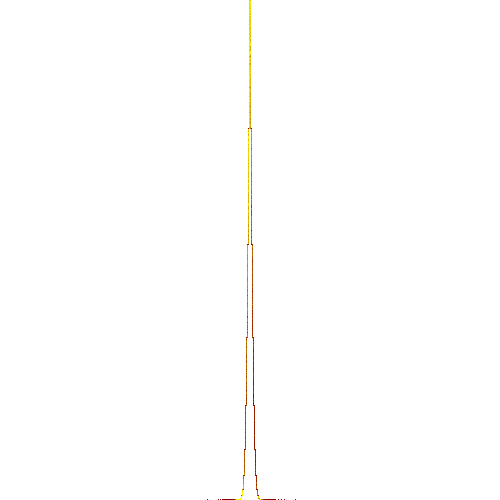

In [124]:
yrange=(0,1)
xrange=(-15,15)

canvas = ds.Canvas(plot_width=500,plot_height=500, x_range=xrange,y_range=yrange)
agg = canvas.points(pop_stats.query("min == 2"), 'mean', 'p_value', agg=ds.count())
tf.shade(agg,cmap=["darkred","yellow"])

In [23]:
agg.shape

(500, 500)

# Datashader with bokeh

In [10]:
bp.output_notebook()
TOOLS = 'pan,wheel_zoom,reset,tap'
# source = ColumnDataSource(df.query("min == 6"))
p = bp.figure(tools=TOOLS, x_range=xrange, y_range=yrange)
def image_callback(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df.query("min == 6"), 'value', 'Molecular Weight', ds.count())
    img = tf.shade(agg,cmap=["darkred","yellow"],how='eq_hist')
    return tf.dynspread(img, threshold=0.25)

InteractiveImage(p, image_callback)

Loading BokehJS ...

In [11]:
bp.output_notebook()
TOOLS = 'pan,wheel_zoom,reset,tap,hover'

p = bp.figure(tools=TOOLS, x_range=xrange, y_range=yrange)
p.hover.tooltips = [
    ("Name", "@Name"),
    ("Molecular Weight", "@{Molecular Weight}"),
    ("Fold Change", "@value")
]

Loading BokehJS ...

# Native Bokeh

In [19]:
# bp.output_notebook()
TOOLS = 'pan,wheel_zoom,reset,hover'
source = ColumnDataSource(single_pt)
p = bp.figure(tools=TOOLS, x_range=xrange, y_range=yrange)
p.hover.tooltips = [
    ("Molecular Weight", "@{Molecular Weight}"),
    ("Fold Change", "@value"),
    ("Name", "@Name")
]
p.circle("value","Molecular Weight", size=5,source=source)

# bp.show(p)
bp.output_file("fc_vs_mw.html", title="Fold Change Vizualization")
bp.show(p)

In [20]:
p.hover.tooltips = [
    ("Molecular Weight", "@{Molecular Weight}"),
    ("Fold Change", "@value"),
    ("Formula", "@Formula")
]
p.circle("")

In [13]:
df[top_q_indexes].groupby('min')['value'].describe()

count      mean       std        min       25%       50%       75%        max
min                                                                                   
0    1653150.0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   0.000000
2    1653150.0 -0.049633  1.080702 -15.246877 -0.433996 -0.033262  0.340233  14.632571
4    1653150.0 -0.044652  1.127554 -14.697979 -0.432703 -0.018257  0.358315  13.688148
6    1653150.0 -0.028886  1.149573 -14.381188 -0.437193 -0.012457  0.391047  14.951015
8    1653150.0 -0.049551  1.124201 -14.280814 -0.454960 -0.024719  0.365041  14.687547
10   1653150.0 -0.060376  1.130880 -15.192937 -0.442741 -0.021461  0.353618  13.980124
20   1653150.0 -0.091273  1.177060 -15.229102 -0.531536 -0.056746  0.346896  13.651907
30   1653150.0 -0.098816  1.207005 -14.764893 -0.536987 -0.045311  0.363073  13.889681
45   1653150.0 -0.128925  1.187559 -15.490631 -0.558996 -0.074157  0.318116  13.633087
60   1653150.0 -0.100397  1.228364 -14.967740 -0.548303 -0.051053  0.361724  14.238437

In [10]:
print(np.array(top_q).shape)
print(np.unique(np.array(top_q)).shape)

(544890,)
(54047,)


In [42]:
len(df)

22144500

In [6]:
by_mol_w = df[df.timepoint == 'C'].sort_values(by='Molecular Weight')

In [8]:
weights = by_mol_w['Molecular Weight'].values
print(weights.shape)

(2214450,)


In [9]:
weights.round(decimals=3).shape

(2214450,)

In [10]:
np.unique(weights.round(decimals=1))[:10]

array([65. , 66. , 66.1, 66.5, 67. , 67.5, 67.9, 68. , 68.1, 68.5])

(array([1.612e+03, 2.665e+03, 4.008e+03, 4.338e+03, 4.808e+03, 4.257e+03,
        3.509e+03, 3.374e+03, 2.737e+03, 2.859e+03, 2.758e+03, 2.622e+03,
        2.308e+03, 2.041e+03, 1.733e+03, 1.637e+03, 1.512e+03, 1.537e+03,
        1.276e+03, 1.327e+03, 1.278e+03, 1.266e+03, 1.082e+03, 1.246e+03,
        1.222e+03, 1.110e+03, 1.443e+03, 1.366e+03, 1.070e+03, 1.012e+03,
        1.198e+03, 6.940e+02, 9.690e+02, 7.280e+02, 6.900e+02, 4.370e+02,
        4.900e+02, 2.640e+02, 1.750e+02, 2.190e+02, 8.100e+01, 7.700e+01,
        8.300e+01, 6.600e+01, 7.900e+01, 9.000e+01, 6.400e+01, 6.800e+01,
        4.900e+01, 5.500e+01, 4.000e+01, 4.800e+01, 4.300e+01, 5.100e+01,
        4.900e+01, 6.700e+01, 6.700e+01, 5.300e+01, 3.500e+01, 3.500e+01,
        6.600e+01, 3.700e+01, 3.100e+01, 2.500e+01, 3.100e+01, 1.700e+01,
        1.600e+01, 2.700e+01, 3.800e+01, 3.400e+01, 3.100e+01, 2.500e+01,
        1.400e+01, 1.100e+01, 1.200e+01, 1.600e+01, 1.900e+01, 1.500e+01,
        1.500e+01, 7.000e+00, 1.200e+0

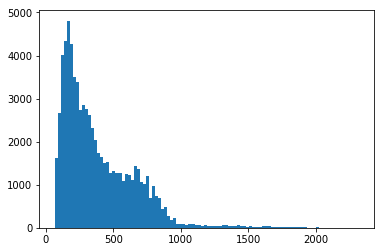

In [11]:
plt.hist(np.unique(weights),bins=100)

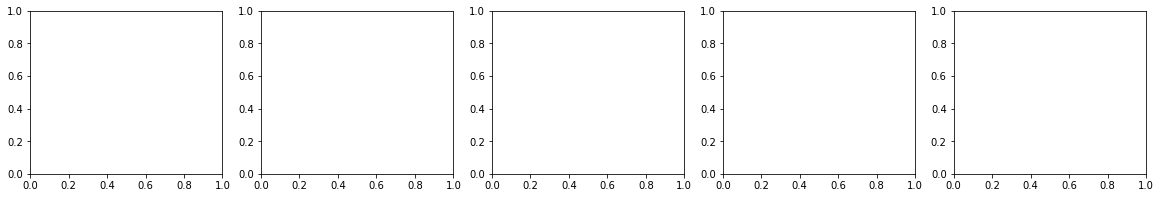

In [12]:
fig,axs = plt.subplots(1,5,figsize=(20,3))

In [ ]:
g = sns.scatterplot(x='value',y='Molecular Weight',data=df[df.timepoint=='D'],ax=axs[1])

In [ ]:
for ax,timepoint in zip(axs,['A','B','C','D','E','F','G','H','I','J']):
    sns.scatterplot(x='value',y='Molecular Weight',data=df[df.timepoint==timepoint],ax=ax)

In [ ]:
fc_var_hi = fc_var[fc_var['var']>=10]
print(len(fc_var_hi))
sns.scatterplot(x='var',y='Molecular Weight',data=fc_var_hi)

In [ ]:
plt.hist(fc_var.values)

In [ ]:
fc_var.shape